# What is RFM Analysis?
RFM stands for Recency, Frequency, and Monetary value, each corresponding to some key customer trait. These RFM metrics are important indicators of a customer’s behavior because frequency and monetary value affects a customer’s lifetime value, and recency affects retention, a measure of engagement.

- Recency: When was the last time they purchased?
- Frequency: How often and for how long have they purchased?
- Monetary Value/Sales: How much have they purchased?



Customer Number:	        Unique Identifier of Donor<br/>
Gender:	                    Gender of person<br/>
Date of Birth:	            Customer´s date of birth (dd.mm.yyyy)<br/>
Postcode:	                Postal code (Austria)<br/>
COUNT2015:	                Sporadic Donation Frequency 2015<br/>
SUM2015:	                Sporadic Donation Sum 2015<br/>
MERCHANDISE2015:	        Has customer made at least one purchase in merchandising store in 2015?<br/>
COUNT2016:	                Sporadic Donation Frequency 2016<br/>
SUM2016:	                Sporadic Donation Sum 2016<br/>
MERCHANDISE2016:	        Has customer made at least one purchase in merchandising store in 2016?<br/>
COUNT2017:	                Sporadic Donation Frequency 2017<br/>
SUM2017:	                Sporadic Donation Sum 2017<br/>
MERCHANDIESE2017:	        Has customer made at least one purchase in merchandising store in 2017?<br/>
COUNT2018:	                Sporadic Donation Frequency 2018<br/>
SUM2018:	                Sporadic Donation Sum 2018<br/>
MERCHANDIESE2018:	        Has customer made at least one purchase in merchandising store in 2018?<br/>
COUNT2019:	                Sporadic Donation Frequency 2019<br/>
SUM2019:	                Sporadic Donation Sum 2019<br/>
MERCHANDISE2019:	        Has customer made at least one purchase in merchandising store in 2019?<br/>
LastPaymentDate:	        Last payment date of customer<br/>
PenultimatePaymentDate:	    Next to last payment date of customer<br/>

## Ideas for feature engineering
- Use next to last payment date to group donors 
- Use time between donations to get the frequency in which doners donate
- Use the amount of donations per year as an additional feature (some donate up to 100 times a year) [df['count_2015'].sort_values(ascending=False)]
- Use purchase in merch store as an additional feature
- Use the donation sum as an additional feature

In [1]:
path = ""

In [5]:
# google colab mount gdrive

#from google.colab import drive
#drive.mount('/content/drive')
#path = "/content/drive/MyDrive/Colab Notebooks/ds-ec/"

Mounted at /content/drive


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, Birch

%matplotlib notebook
%matplotlib inline

In [7]:
df = pd.read_csv(path + "Data/Dataset.csv", sep = ";")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df.head()

,Customer Number,Gender,Date of Birth,Postcode,COUNT2015,SUM2015,MERCHANDISE2015,COUNT2016,SUM2016,MERCHANDISE2016,COUNT2017,SUM2017,MERCHANDIESE2017,COUNT2018,SUM2018,MERCHANDIESE2018,COUNT2019,SUM2019,MERCHANDISE2019,LastPaymentDate,PenultimatePaymentDate
0,1,female,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,"4,5",0,18.12.2019,NaN
1,2,female,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,"1,53",0,28.12.2019,NaN
2,3,female,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,05.12.2019,NaN
3,4,female,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,"4,5",0,04.06.2019,NaN
4,5,female,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,"4,95",0,30.03.2019,NaN


In [9]:
df.shape

(406734, 21)

## Data cleaning

In [10]:
def check_for_missing_and_null(df):
    null_df = pd.DataFrame({'columns': df.columns, 
                            'percent_null': df.isnull().sum() * 100 / len(df), 
                            'percent_zero': df.isin([0]).sum() * 100 / len(df)
                           } )
    return null_df

In [11]:
check_for_missing_and_null(df)

,columns,percent_null,percent_zero
Customer Number,Customer Number,0.000000,0.000000
Gender,Gender,0.000000,0.000000
Date of Birth,Date of Birth,38.229162,0.000000
Postcode,Postcode,2.256020,0.000000
COUNT2015,COUNT2015,0.000000,44.708581
SUM2015,SUM2015,0.000000,0.000000
MERCHANDISE2015,MERCHANDISE2015,0.000000,98.797986
COUNT2016,COUNT2016,0.000000,46.104088
SUM2016,SUM2016,0.000000,0.000000
MERCHANDISE2016,MERCHANDISE2016,0.000000,98.734062


In [12]:
# replace tnull values with 0 so our algorithms can work with it
df['Date of Birth'] = df['Date of Birth'].fillna(0)
df['Postcode'] = df['Postcode'].fillna(0)
df['PenultimatePaymentDate'] = df['PenultimatePaymentDate'].fillna(0)

In [13]:
check_for_missing_and_null(df)

,columns,percent_null,percent_zero
Customer Number,Customer Number,0.0,0.000000
Gender,Gender,0.0,0.000000
Date of Birth,Date of Birth,0.0,38.229162
Postcode,Postcode,0.0,2.256020
COUNT2015,COUNT2015,0.0,44.708581
SUM2015,SUM2015,0.0,0.000000
MERCHANDISE2015,MERCHANDISE2015,0.0,98.797986
COUNT2016,COUNT2016,0.0,46.104088
SUM2016,SUM2016,0.0,0.000000
MERCHANDISE2016,MERCHANDISE2016,0.0,98.734062


In [14]:
df = df.rename(
    {
        'Customer Number': 'id', 
        'Gender': 'gender', 
        'Date of Birth': 'dob',
        'Postcode': 'zip',
        'COUNT2015': 'count_2015',
        'SUM2015': 'sum_2015',
        'MERCHANDISE2015': 'merch_2015',
        'COUNT2016': 'count_2016',
        'SUM2016': 'sum_2016',
        'MERCHANDISE2016': 'merch_2016',
        'COUNT2017': 'count_2017',
        'SUM2017': 'sum_2017',
        'MERCHANDIESE2017': 'merch_2017',
        'COUNT2018': 'count_2018',
        'SUM2018': 'sum_2018',
        'MERCHANDIESE2018': 'merch_2018',
        'COUNT2019': 'count_2019',
        'SUM2019': 'sum_2019',
        'MERCHANDISE2019': 'merch_2019',
        'LastPaymentDate': 'last_payment_date',
        'PenultimatePaymentDate': 'penultimate_payment_date',
    }, axis='columns')

In [15]:
df.head()

,id,gender,dob,zip,count_2015,sum_2015,merch_2015,count_2016,sum_2016,merch_2016,count_2017,sum_2017,merch_2017,count_2018,sum_2018,merch_2018,count_2019,sum_2019,merch_2019,last_payment_date,penultimate_payment_date
0,1,female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"4,5",0,18.12.2019,0
1,2,female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"1,53",0,28.12.2019,0
2,3,female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,05.12.2019,0
3,4,female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"4,5",0,04.06.2019,0
4,5,female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"4,95",0,30.03.2019,0


In [16]:
df.shape

(406734, 21)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406734 entries, 0 to 406733
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        406734 non-null  int64 
 1   gender                    406734 non-null  object
 2   dob                       406734 non-null  object
 3   zip                       406734 non-null  object
 4   count_2015                406734 non-null  int64 
 5   sum_2015                  406734 non-null  object
 6   merch_2015                406734 non-null  int64 
 7   count_2016                406734 non-null  int64 
 8   sum_2016                  406734 non-null  object
 9   merch_2016                406734 non-null  int64 
 10  count_2017                406734 non-null  int64 
 11  sum_2017                  406734 non-null  object
 12  merch_2017                406734 non-null  int64 
 13  count_2018                406734 non-null  int64 
 14  sum_

In [18]:
# convert sum to floats
df['sum_2015'] = df['sum_2015'].apply(lambda x: float(x.replace(",",".")))
df['sum_2016'] = df['sum_2016'].apply(lambda x: float(x.replace(",",".")))
df['sum_2017'] = df['sum_2017'].apply(lambda x: float(x.replace(",",".")))
df['sum_2018'] = df['sum_2018'].apply(lambda x: float(x.replace(",",".")))
df['sum_2019'] = df['sum_2019'].apply(lambda x: float(x.replace(",",".")))

In [19]:
# convert object to string
df['zip'] = df['zip'].astype('str') 
df['last_payment_date'] = df['last_payment_date'].astype('str') 
df['penultimate_payment_date'] = df['penultimate_payment_date'].astype('str')

In [20]:
print("ids:", df['id'].nunique())
print("total:", df.shape[0])

ids: 406734
total: 406734


# RFM

## Recency: When was the last time they donated?

In [21]:
# add last_payment_year and last_payment_month to the dataset
df['last_payment_year'] = df['last_payment_date'].apply(lambda x: int(x.split(".")[2])) 
df['last_payment_month'] = df['last_payment_date'].apply(lambda x: int(x.split(".")[1]))

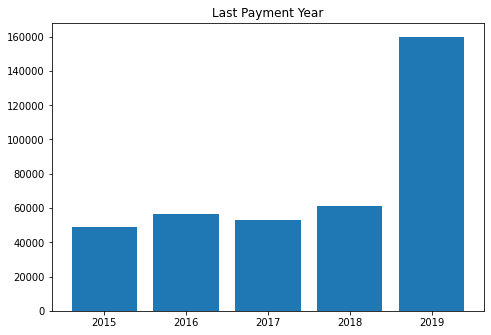

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_yticks(np.arange(0, 200000, 20000))
years = ['2015', '2016', '2017', '2018', '2019']
counts = [
    len(df[df['last_payment_year'] == 2015]),
    len(df[df['last_payment_year'] == 2016]),
    len(df[df['last_payment_year'] == 2017]),
    len(df[df['last_payment_year'] == 2018]),
    len(df[df['last_payment_year'] == 2019])
]

ax.bar(years, counts)
plt.title('Last Payment Year')
plt.show()

## Frequency: How often have they donated?

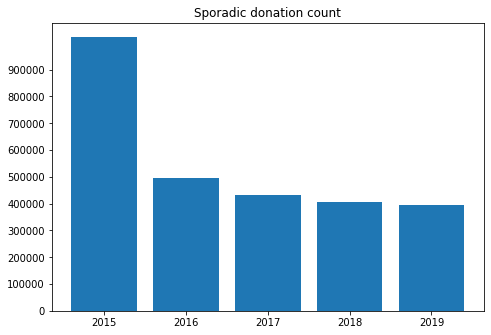

In [23]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_yticks(np.arange(0, 1000000, 100000))
years = ['2015', '2016', '2017', '2018', '2019']
counts = [
    df['count_2015'].sum(),
    df['count_2016'].sum(),
    df['count_2017'].sum(),
    df['count_2018'].sum(),
    df['count_2019'].sum()
]

ax.bar(years, counts)
plt.title('Sporadic donation count')
plt.show()

## Monetary: How much have they donated?

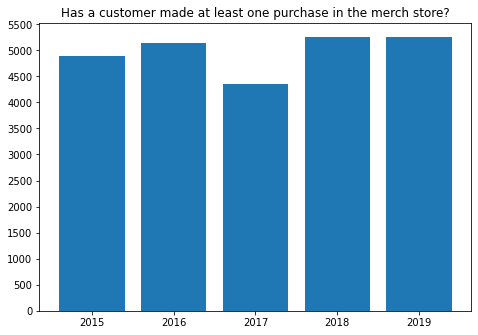

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_yticks(np.arange(0, 6000, 500))
years = ['2015', '2016', '2017', '2018', '2019']
counts = [
    df['merch_2015'].sum(),
    df['merch_2016'].sum(),
    df['merch_2017'].sum(),
    df['merch_2018'].sum(),
    df['merch_2019'].sum()
]

ax.bar(years, counts)
plt.title('Has a customer made at least one purchase in the merch store?')
plt.show()

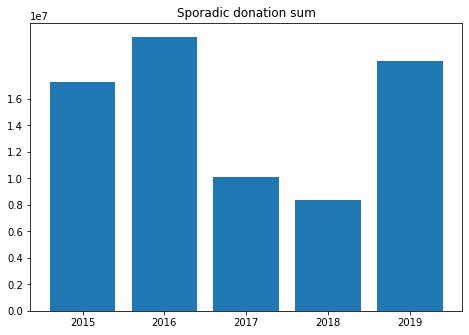

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_yticks(np.arange(0, 18000000, 2000000))
years = ['2015', '2016', '2017', '2018', '2019']
counts = [
    round(df['sum_2015'].sum()),
    round(df['sum_2016'].sum()),
    round(df['sum_2017'].sum()),
    round(df['sum_2018'].sum()),
    round(df['sum_2019'].sum())
]

ax.bar(years, counts)
plt.title('Sporadic donation sum')
plt.show()

## Calculate RFM Values for each customer
- Recency: a group for each year, for example: <br/>
-- Donated in 2015 -> Group 0<br/>
-- Donated in 2019 -> Group 4

- Frequency + Monetary<br/>
-- We take the sums of e.g. sum_2015 to sum_2019 <br/>
-- Calculate the percentiles for each new feature (e.g. 25% percentile of merch sales)<br/>
-- Assign each customer a group depending on the percentile

In [26]:
def assign_resency_group(last_payment_year):       
    if last_payment_year == 2016:
        return 1
    if last_payment_year == 2017:
        return 2
    if last_payment_year == 2018:
        return 3
    if last_payment_year == 2019:
        return 4   

    return 0  

In [27]:
df['recency_group'] = df['last_payment_year'].apply(lambda x: assign_resency_group(x)) 

In [28]:
df_counts = df[['count_2015','count_2016','count_2017','count_2018','count_2019']]
df['frequency_group']= df_counts.sum(axis=1)

In [29]:
df_sums = df[['sum_2015','sum_2016','sum_2017','sum_2018','sum_2019']]
df['monetary_group_sum']= df_sums.sum(axis=1)

In [30]:
df.head(3)

,id,gender,dob,zip,count_2015,sum_2015,merch_2015,count_2016,sum_2016,merch_2016,count_2017,sum_2017,merch_2017,count_2018,sum_2018,merch_2018,count_2019,sum_2019,merch_2019,last_payment_date,penultimate_payment_date,last_payment_year,last_payment_month,recency_group,frequency_group,monetary_group_sum
0,1,female,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,1,4.50,0,18.12.2019,0,2019,12,4,1,4.50
1,2,female,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,1,1.53,0,28.12.2019,0,2019,12,4,1,1.53
2,3,female,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,1,3.00,0,05.12.2019,0,2019,12,4,1,3.00


In [31]:
## cache the calculations for each column
cache_dict = {}

def assign_percentile(column, value):
    if column + "_20" in cache_dict:
        is_20 = cache_dict[column + "_20"]
    else:
        is_20 = np.percentile(df[column], 20)
        cache_dict[column + "_20"] = is_20 

    if column + "_40" in cache_dict:
        is_40 = cache_dict[column + "_40"]
    else:
        is_40 = np.percentile(df[column], 40)
        cache_dict[column + "_40"] = is_40         

    if column + "_60" in cache_dict:
        is_60 = cache_dict[column + "_60"]
    else:
        is_60 = np.percentile(df[column], 60)
        cache_dict[column + "_60"] = is_60 

    if column + "_80" in cache_dict:
        is_80 = cache_dict[column + "_80"]
    else:
        is_80 = np.percentile(df[column], 80)
        cache_dict[column + "_80"] = is_80 

    if value >= is_80:
        return 4
    if value >= is_60:
        return 3
    if value >= is_40:
        return 2
    if value >= is_20:
        return 2        
    return 0


In [32]:
df['frequency_group_p'] = df['frequency_group'].apply(lambda x: assign_percentile('frequency_group', x)) 
df['monetary_group_sum_p'] = df['monetary_group_sum'].apply(lambda x: assign_percentile('monetary_group_sum', x)) 


In [33]:
def add_year_of_birth(dob):
    try:
        return int(dob.split(".")[2])
    except:
        return 0

df['yob'] = df['dob'].apply(lambda x: add_year_of_birth(x)) 

In [34]:
def clean_zip(zip):
    try:
        if len(zip) != 4:
            return 0
        return int(zip)
    except:
        return 0

df['zip'] = df['zip'].apply(lambda x: clean_zip(x))

In [35]:
def one_hot_gender(gender):
    if gender == "female":
        return 0
    if gender == "male":
        return 1
    if gender == "family":
        return 2

df['gender'] = df['gender'].apply(lambda x: one_hot_gender(x))

In [36]:
df.head(1)

,id,gender,dob,zip,count_2015,sum_2015,merch_2015,count_2016,sum_2016,merch_2016,count_2017,sum_2017,merch_2017,count_2018,sum_2018,merch_2018,count_2019,sum_2019,merch_2019,last_payment_date,penultimate_payment_date,last_payment_year,last_payment_month,recency_group,frequency_group,monetary_group_sum,frequency_group_p,monetary_group_sum_p,yob
0,1,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,1,4.5,0,18.12.2019,0,2019,12,4,1,4.5,2,0,0


## Outlier detection

In [37]:
freq = df['frequency_group'].sort_values(ascending=False)[0:10]
mon = df['monetary_group_sum'].sort_values(ascending=False)[0:10]

print("freq")
print(freq)
print("-----------------")
print("mon")
print(mon)

freq
122528    273
221364    146
300463    145
331881    144
232772    142
296895    135
69789     133
296787    132
349619    132
385518    126
Name: frequency_group, dtype: int64
-----------------
mon
63293     2400225.00
232370    1520796.30
66226      750000.00
302373     388113.60
120237     375000.00
125874     345975.20
382349     338811.37
44753      262500.00
370805     207134.74
51427      200750.00
Name: monetary_group_sum, dtype: float64


In [38]:
# cutoff by 399 ~ 1 % of df
freq_threshold = df['frequency_group'].sort_values(ascending=False)[3990:4000]
mon_threshold = df['monetary_group_sum'].sort_values(ascending=False)[3990:4000]

In [39]:
print("freq_threshold", freq_threshold.values[0])
print("mon_threshold", mon_threshold.values[0])

freq_threshold 54
mon_threshold 1375.25


In [40]:
print("Before:", df.shape)

under_freq_threshold = df['frequency_group'] <= freq_threshold.values[0]
df = df[under_freq_threshold]

under_mon_threshold = df['monetary_group_sum'] <= mon_threshold.values[0]
df = df[under_mon_threshold]


print("After:", df.shape)

Before: (406734, 29)
After: (399608, 29)


In [41]:
print("Before:", df.shape)
# identify outliers
# EllipticEnvelope: detecting outliers in a Gaussian distributed dataset.
#ee = EllipticEnvelope(contamination=0.01)
#normal_values = ee.fit_predict(df_remove_outliers)
# select all rows that are not outliers
# df = df[normal_values != -1]
print("After:", df.shape)

Before: (399608, 29)
After: (399608, 29)


## K-Means

In [42]:
columns_to_use = [
    'recency_group',
    'frequency_group_p',
    'monetary_group_sum_p']

In [43]:
df_kmeans = df[columns_to_use].copy()

In [44]:
df_kmeans.sample(10)

,recency_group,frequency_group_p,monetary_group_sum_p
184354,3,2,0
313778,4,3,3
229260,3,2,0
81345,3,2,3
166153,0,2,2
354142,4,2,2
95596,0,2,2
366035,3,2,2
106039,1,3,3
327783,4,3,2


In [45]:
# Scaling with Standard Scaler
scaler = StandardScaler()
df_kmeans = scaler.fit_transform(df_kmeans)
rfm_model = pd.DataFrame(df_kmeans, columns=columns_to_use)

In [46]:
rfm_model.sample(3)

,recency_group,frequency_group_p,monetary_group_sum_p
216655,0.366277,1.681384,1.390295
331636,-1.566448,1.681384,-0.171887
60813,0.366277,-0.851825,-1.734069


In [47]:
# Find K best with Elbow Method 
wss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, init = 'k-means++')
    kmeans.fit(rfm_model)
    wss.append(kmeans.inertia_)

Text(0, 0.5, 'Within Sum of Squares')

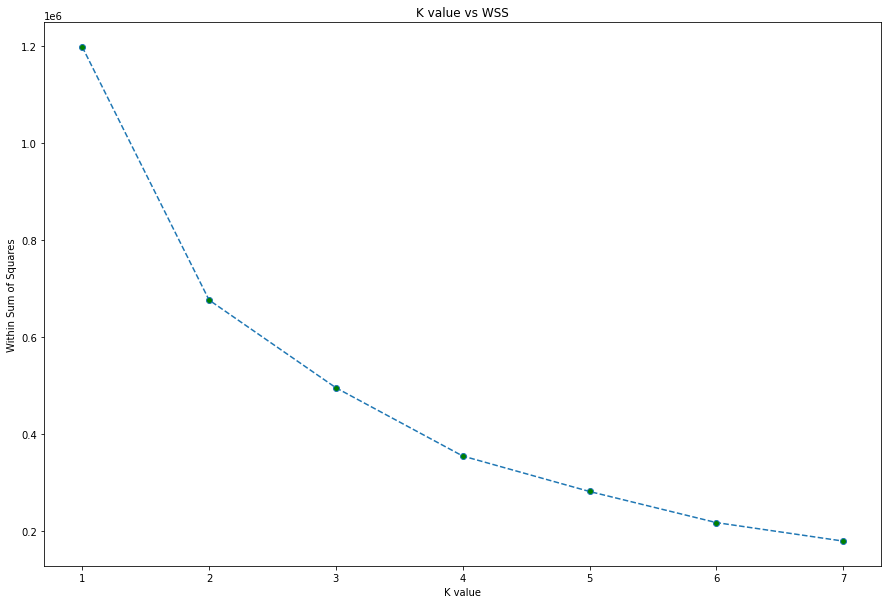

In [48]:
# Show graph elbow method
plt.figure(figsize=(15,10))
plt.plot(range(1,8),wss,marker='o',markerfacecolor='green',linestyle='dashed')
plt.title('K value vs WSS')
plt.xlabel('K value')
plt.ylabel('Within Sum of Squares')

### Elbow Method
The elbow method looks at the percentage of variance explained as a function of the number of clusters. Here, we have chosen a number of clusters so that adding another cluster doesn’t give much variance for better modeling of the data.
- Compute k-means clustering algorithm for different values of k (1–10)
- For each k, calculate the total within-cluster sum of square (wss)
- Plot the elbow curve of wss according to the number of clusters k.
- The location of elbow in the plot is generally considered as an indicator of the appropriate number of clusters.

KMeans with 3 clusters

In [65]:
kmeans = KMeans(n_clusters=2, init = 'k-means++')
kmeans.fit(rfm_model)
cluster = kmeans.predict(rfm_model)

Cluster analysis

In [66]:
df['cluster'] = cluster
df['cluster'].value_counts()

0    341156
1     58452
Name: cluster, dtype: int64

In [67]:
kmeans_final = df[['cluster','last_payment_year','frequency_group','monetary_group_sum']].groupby('cluster').mean()
kmeans_final

,last_payment_year,frequency_group,monetary_group_sum
cluster,,,
0,2017.546243,3.660179,73.206240
1,2018.844950,20.213166,444.894466


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


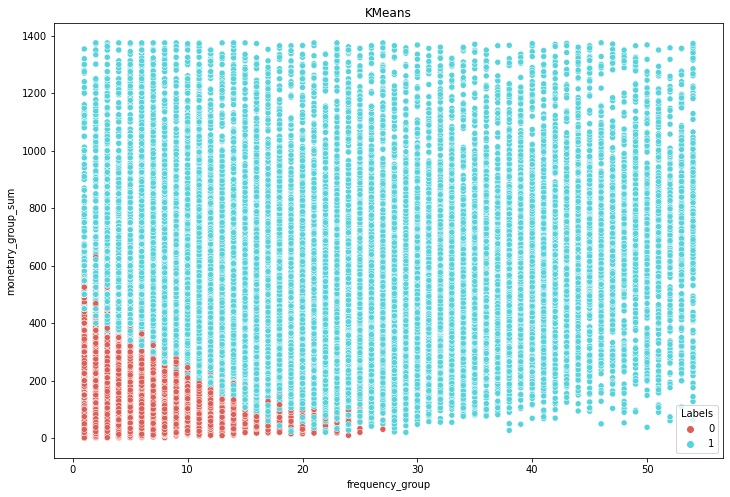

In [69]:
df['Labels'] = kmeans.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(df['frequency_group'], df['monetary_group_sum'], hue=df['Labels'], palette=sns.color_palette('hls', 2))
plt.title('KMeans')
plt.show()

## Birch clustering algorithm

In [70]:
df_birch = df[columns_to_use].copy()

In [71]:
# Scaling with Standard Scaler
scaler = StandardScaler()
df_birch = scaler.fit_transform(df_birch)
rfm_model = pd.DataFrame(df_birch, columns=columns_to_use)

In [72]:
brc = Birch().fit(rfm_model)
cluster = brc.predict(rfm_model)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


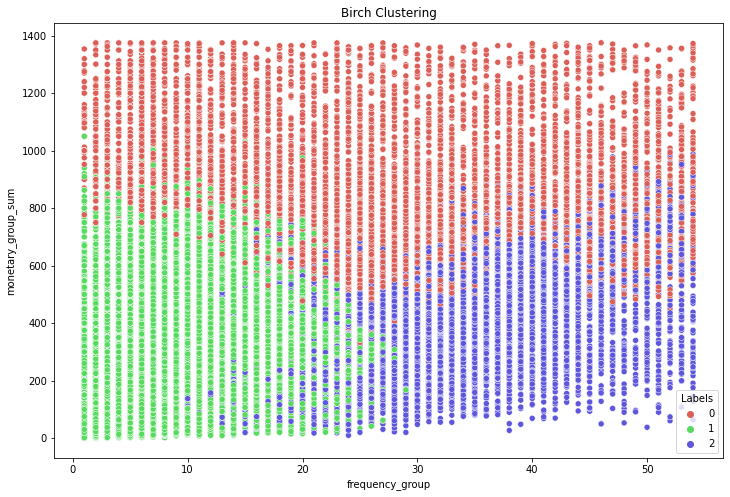

In [73]:
df['Labels'] = brc.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(df['frequency_group'], df['monetary_group_sum'], hue=df['Labels'], palette=sns.color_palette('hls', 3))
plt.title('Birch Clustering')
plt.show()

In [74]:
df['cluster'] = cluster
df['cluster'].value_counts()
birch_final =  df[['cluster','last_payment_year','frequency_group','monetary_group_sum']].groupby('cluster').mean()
birch_final

,last_payment_year,frequency_group,monetary_group_sum
cluster,,,
0,2018.982985,26.119817,842.676720
1,2017.643846,4.431482,97.080534
2,2018.880856,27.670362,350.439627


In [75]:
kmeans_final

,last_payment_year,frequency_group,monetary_group_sum
cluster,,,
0,2017.546243,3.660179,73.206240
1,2018.844950,20.213166,444.894466


## K-Means without RFM

In [76]:
columns_to_use = [
    'yob',
    'zip',
    'recency_group',
    'frequency_group',
    'monetary_group_sum']

In [77]:
df_kmeans = df[columns_to_use].copy()

In [78]:
df_kmeans.sample(3)

,yob,zip,recency_group,frequency_group,monetary_group_sum
304628,0,1160,2,1,20.0
393288,1943,0,0,8,107.5
18515,0,3003,1,1,30.0


In [79]:
# Scaling with Standard Scaler
scaler = StandardScaler()
df_kmeans = scaler.fit_transform(df_kmeans)
rfm_model = pd.DataFrame(df_kmeans, columns=columns_to_use)

In [80]:
rfm_model.sample(3)

,yob,zip,recency_group,frequency_group,monetary_group_sum
189489,-1.260427,0.275168,1.010519,-0.654384,-0.645875
156719,0.824546,1.352223,-0.277965,-0.396826,-0.014770
197150,-1.260427,0.089292,1.010519,-0.525605,-0.432160


In [81]:
# Find K best with Elbow Method 
wss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, init = 'k-means++')
    kmeans.fit(rfm_model)
    wss.append(kmeans.inertia_)

Text(0, 0.5, 'Within Sum of Squares')

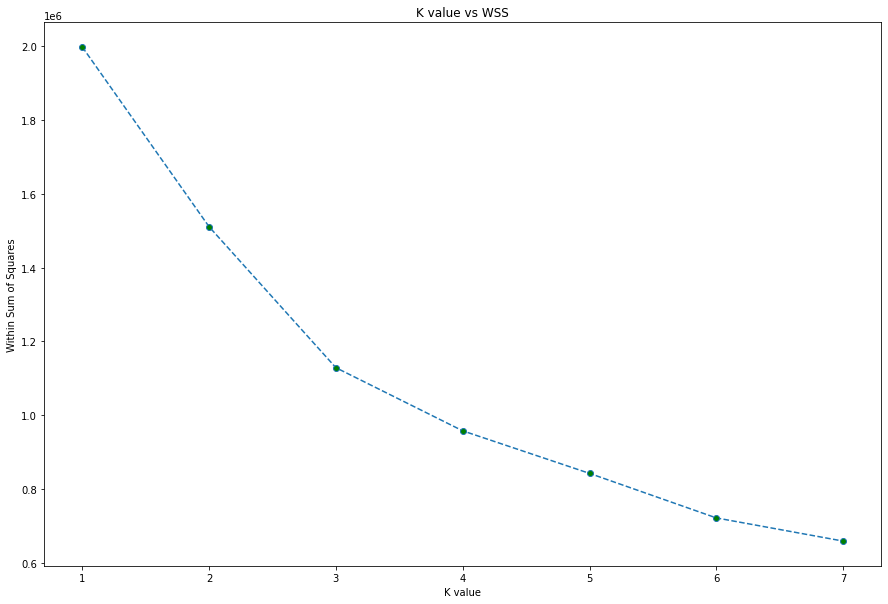

In [82]:
# Show graph elbow method
plt.figure(figsize=(15,10))
plt.plot(range(1,8),wss,marker='o',markerfacecolor='green',linestyle='dashed')
plt.title('K value vs WSS')
plt.xlabel('K value')
plt.ylabel('Within Sum of Squares')

In [83]:
kmeans = KMeans(n_clusters=3, init = 'k-means++')
kmeans.fit(rfm_model)
cluster = kmeans.predict(rfm_model)

In [84]:
df['cluster'] = cluster
df['cluster'].value_counts()

1    206872
2    149008
0     43728
Name: cluster, dtype: int64

In [85]:
kmeans_final = df[['cluster','last_payment_year','frequency_group','monetary_group_sum']].groupby('cluster').mean()
kmeans_final

,last_payment_year,frequency_group,monetary_group_sum
cluster,,,
0,2018.896931,22.884696,504.482942
1,2017.732303,4.566268,91.033368
2,2017.401005,3.253899,67.697266


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


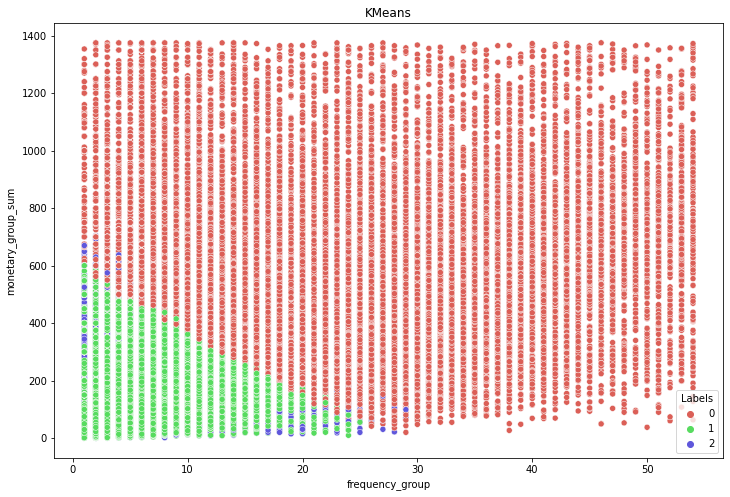

In [86]:
df['Labels'] = kmeans.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(df['frequency_group'], df['monetary_group_sum'], hue=df['Labels'], palette=sns.color_palette('hls', 3))
plt.title('KMeans')
plt.show()